# Introduction
*Data Analysis is the process of collecting, organizing, and analyzing data to provide insight which can be used to make data driven decisions for businesses.*

According to Google, there are six steps involved in Data Analysis process - **[Ask](#Ask-Phase), [Prepare](#Prepare-Phase), [Process](#Process-Phase), [Analyze](#Analyze-Phase), [Share](#Share-Phase),** and **[Act](#Act-Phase)**. It is important to perform each step very carefully as the accuracy of successive steps depends on the correct execution of the previous steps.

This Case Study is related to a company Bellabeat. 

**About the Company** <br>
Bellabeat founded in 2013, a high-tech company that manufactures health-focused smart products for women. Bellabeat products are available on online retail websites including there own e-commerce channel on their [website](https://bellabeat.com/). Through their products Bellabeat collects data on activity, sleep, stress, and reproductive health. Urška Sršen, co-founder of the company believes that analysis of smart device usage data would reveal more opportunities for growth.

# Ask Phase
Urška Sršen, co-founder of the company asks us to analyze smart device usage data to gain insight into how customers use non-Bellabeat smart devices and then select one Bellabeat product to apply these insights.

The questions that require to be answered in this context are:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

**Business Task:** Analyzing non-Bellabeat smart device usage data to find trends in user behaviour for guiding Bellabeat marketing strategy

The key stakeholders are the founders of Bellabeat - Urška Sršen (cofounder and chief creative officer) and Sando Mur (cofounder).

# Prepare phase
The data is located in this [open repository](https://zenodo.org/record/53894#.Y7M3YHZBy5f),can be downloaded and used for analysis purposes under [creative commons license](https://creativecommons.org/licenses/by/4.0/legalcode). A part of the same data is available in the Kaggle [dataset](https://www.kaggle.com/datasets/arashnic/fitbit) which has been used here for this case study.
The datasets were generated (from Fitbit trackers) by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. The data has been made available over Zenodo, a general purpose open repository. This information was generated from the Fitbit trackers of the respondents.

The data used in this study is from 12th April 2016 (*04-12-16*) to 12th May 2016 (*05-12-16*). All the information is consistent across the sheets for different days in the period. The sheets tell us information about each user's - 
1. Steps, distance covered, calories burned, time taken and distance covered in different activities on daily basis at different levels (hours, minutes and day) 
2. Heart rate 
3. Sleep duration 
4. Weight log information
 
**Reliable:** Data is *less* reliable as it has been accessed from a third party.

**Original:** The data is completely *original* as it has been generated from the Fitbit trackers of the users. 

**Comprehensive:** The data is *not* coomprehensive as there are lot of variables for description. 

**Current:** The data is *not* current as it was gathered in 2016. However, we will analyse it for human behaviour which doesn't tend to change for a few years.

**Cited:** The data is properly *cited* with the source and license.

The sheets tell us about the steps taken, distance walked, heart rate, activity minutes, and sleep time for different users who participated in the survey. This information about the users can help us identify the user behaviour which can be applied to guide Bellabeat's marketing strategy.

# Process Phase
We will be using Python to process the data. 
1. The data from `.csv` files is loaded into dataframes.
2. We look for NULL/NA values and duplicate rows in the data. We remove the NULL/NA and duplicate values.
3. The column names are cleaned for further processing.
4. We change the datatypes of datetime columns for analysis purposes and add a few more columns that will help us in analyzing the data in better way. The `day_of_week` and `hour_of_day` give the opportunity to aggregate the data. `

### Importing the required libraries and loading the data into Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
import warnings; warnings.filterwarnings("ignore") # hide Python warnings 
from plotnine import *
from datetime import datetime
import seaborn as sns
!pip install skimpy
from skimpy import clean_columns # for cleaning column names
!pip install venn
import venn

daily_activity = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
heart_rate_seconds = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv')
hourly_calories = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
hourly_intensities = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')
hourly_steps = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
day_sleep = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
weight_log = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 338.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 876.1 kB/s eta 0:00:00
  Attempting uninstall: rich
    Found existing installation: rich 12.1.0
    Uninstalling rich-12.1.0:
      Successfully uninstalled rich-12.1.0
  Attempting uninstall: click
    Found existing installation: click 8.0.4
    Uninstalling click-8.0.4:
      Successfully uninstalled click-8.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.3.1 requires typing-extensions<4.2.0,>=3.7.4; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompatible.
flax 0.6.1 requires rich>=11.1, but you have rich 10.16.2 which is incompatible.
flask 2.2.2 requires click>=8.0, but you have click 7.1.2 which is incompatible.
cached-path 1.1.6 requires rich<13.0,>=12.1, but you have rich 10.16

### Looking for NULL and duplicate values

In [2]:
data_list= ["daily_activity","heart_rate_seconds","hourly_calories",
           "hourly_steps","day_sleep","weight_log"]
# the above data_list is the list of names of the dataframes

myVars = globals() # myVars will now be used to convert strings to variable names myVars["name"]
for item in data_list:
    print(myVars[item].isnull().mean())
    
for item in data_list:
    print("Any duplicates in ", item,":", myVars[item].duplicated().any())


Id                          0.0
ActivityDate                0.0
TotalSteps                  0.0
TotalDistance               0.0
TrackerDistance             0.0
LoggedActivitiesDistance    0.0
VeryActiveDistance          0.0
ModeratelyActiveDistance    0.0
LightActiveDistance         0.0
SedentaryActiveDistance     0.0
VeryActiveMinutes           0.0
FairlyActiveMinutes         0.0
LightlyActiveMinutes        0.0
SedentaryMinutes            0.0
Calories                    0.0
dtype: float64
Id       0.0
Time     0.0
Value    0.0
dtype: float64
Id              0.0
ActivityHour    0.0
Calories        0.0
dtype: float64
Id              0.0
ActivityHour    0.0
StepTotal       0.0
dtype: float64
Id                    0.0
SleepDay              0.0
TotalSleepRecords     0.0
TotalMinutesAsleep    0.0
TotalTimeInBed        0.0
dtype: float64
Id                0.000000
Date              0.000000
WeightKg          0.000000
WeightPounds      0.000000
Fat               0.970149
BMI               0.0

We see that there are a lot of NULL values in the `Fat` column of `weight_log` dataframe and `day_sleep` dataframe has duplicate rows. We move ahead drop the `Fat` column and remove the duplicate values.

In [3]:
print("Dropping 'Fat' column from weight_log")
weight_log = weight_log.drop(["Fat"],axis=1)

print("removing duplicates from day_sleep")
print("shape before removal for day_sleep: ",day_sleep.shape)
day_sleep = day_sleep.loc[~day_sleep.duplicated()]
print("shape after removal for day_sleep: ",day_sleep.shape)
# print("Any duplicates in minute_sleep: ", minute_sleep.duplicated().any())
print("Any duplicates in day_sleep: ", day_sleep.duplicated().any())

Dropping 'Fat' column from weight_log
removing duplicates from day_sleep
shape before removal for day_sleep:  (413, 5)
shape after removal for day_sleep:  (410, 5)
Any duplicates in day_sleep:  False


### Cleaning the column names for further processing and analysis

In [4]:
print("Cleaning Column Names")
for item in data_list:
    myVars[item] = clean_columns(myVars[item]) # clea_columns(df) from skimpy is used

# for consistency all the columns corresponding to datetime are changed to 'time'
daily_activity.rename(columns = {'activity_date':'time'}, inplace = True)
hourly_calories.rename(columns = {'activity_hour':'time'}, inplace = True) 
hourly_steps.rename(columns = {'activity_hour':'time','step_total':'steps'}, inplace = True)
day_sleep.rename(columns = {'sleep_day':'time',}, inplace = True)
weight_log.rename(columns = {'date':'time'}, inplace = True)


Cleaning Column Names


### Finding out the number of users for whom data is available across the dataframes

In [5]:
for item in data_list:
    print("The number of unique Ids in", item, "are:",len(pd.unique(myVars[item].id)))


The number of unique Ids in daily_activity are: 33
The number of unique Ids in heart_rate_seconds are: 14
The number of unique Ids in hourly_calories are: 33
The number of unique Ids in hourly_steps are: 33
The number of unique Ids in day_sleep are: 24
The number of unique Ids in weight_log are: 8


In `weight_log` and `heart_rate_seconds` dataframes very less different users' data is available, so we will ignore it.


In [6]:
print("There are very less people who submitted data for heart_rate_seconds and weight_log")
print("Removing heart_rate_seconds")
data_list.remove("heart_rate_seconds")
print("Removing weight_log")
data_list.remove("weight_log")
print(data_list)

There are very less people who submitted data for heart_rate_seconds and weight_log
Removing heart_rate_seconds
Removing weight_log
['daily_activity', 'hourly_calories', 'hourly_steps', 'day_sleep']


### Changing the datatypes and adding new columns for better analysis

In [7]:
print("Changing the datatype of date time columns from string to datetime")
for item in data_list[0:1]:
    list_time = []
    for row in myVars[item].itertuples():
        x = datetime.strptime(row.time,"%m/%d/%Y")
        list_time.append(x)
    myVars[item].time = list_time
    print("changed for: ",  item)
    
for item in data_list[1:]:
    list_time = []
    for row in myVars[item].itertuples():
        x = datetime.strptime(row.time,"%m/%d/%Y %I:%M:%S %p")
        list_time.append(x)
    myVars[item].time = list_time
    print("changed for: ", item)
    
# adding new columns: date, day_of_week, hour_of_day
print("Adding new columns: date, day_of_week, and hour_of_day")
for item in data_list:
    myVars[item]['date'] = myVars[item].time.dt.date
    myVars[item]['day_of_week'] = myVars[item].time.apply(lambda x : x.strftime("%a"))
    myVars[item].day_of_week = pd.Categorical(myVars[item].day_of_week, 
                                              categories = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
    myVars[item]['hour_of_day'] = myVars[item].time.dt.hour
    print("Added for: ", item)
    

Changing the datatype of date time columns from string to datetime
changed for:  daily_activity
changed for:  hourly_calories
changed for:  hourly_steps
changed for:  day_sleep
Adding new columns: date, day_of_week, and hour_of_day
Added for:  daily_activity
Added for:  hourly_calories
Added for:  hourly_steps
Added for:  day_sleep


**Before moving ahead, let us have a look at the data.**

In [8]:
for item in data_list:
    print(item)
    display(myVars[item].head())
    print(myVars[item].shape)

daily_activity


,id,time,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,date,day_of_week,hour_of_day
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,Tue,0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,Wed,0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,2016-04-14,Thu,0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,Fri,0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,Sat,0


(940, 18)
hourly_calories


,id,time,calories,date,day_of_week,hour_of_day
0,1503960366,2016-04-12 00:00:00,81,2016-04-12,Tue,0
1,1503960366,2016-04-12 01:00:00,61,2016-04-12,Tue,1
2,1503960366,2016-04-12 02:00:00,59,2016-04-12,Tue,2
3,1503960366,2016-04-12 03:00:00,47,2016-04-12,Tue,3
4,1503960366,2016-04-12 04:00:00,48,2016-04-12,Tue,4


(22099, 6)
hourly_steps


,id,time,steps,date,day_of_week,hour_of_day
0,1503960366,2016-04-12 00:00:00,373,2016-04-12,Tue,0
1,1503960366,2016-04-12 01:00:00,160,2016-04-12,Tue,1
2,1503960366,2016-04-12 02:00:00,151,2016-04-12,Tue,2
3,1503960366,2016-04-12 03:00:00,0,2016-04-12,Tue,3
4,1503960366,2016-04-12 04:00:00,0,2016-04-12,Tue,4


(22099, 6)
day_sleep


,id,time,total_sleep_records,total_minutes_asleep,total_time_in_bed,date,day_of_week,hour_of_day
0,1503960366,2016-04-12,1,327,346,2016-04-12,Tue,0
1,1503960366,2016-04-13,2,384,407,2016-04-13,Wed,0
2,1503960366,2016-04-15,1,412,442,2016-04-15,Fri,0
3,1503960366,2016-04-16,2,340,367,2016-04-16,Sat,0
4,1503960366,2016-04-17,1,700,712,2016-04-17,Sun,0


(410, 8)


In [9]:
day_sleep.total_minutes_asleep.sum()/1440

119.34791666666666

# Analyze Phase

### Analyzing the overall data for trends

In [10]:
f = daily_activity.corr()
# display(f)
f[(f>0.5) | (f<-0.5)]

,id,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,hour_of_day
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_steps,NaN,1.000000,0.985369,0.984822,NaN,0.740115,0.507105,0.692208,NaN,0.667079,NaN,0.569600,NaN,0.591568,NaN
total_distance,NaN,0.985369,1.000000,0.999505,NaN,0.794582,NaN,0.662002,NaN,0.681297,NaN,0.516300,NaN,0.644962,NaN
tracker_distance,NaN,0.984822,0.999505,1.000000,NaN,0.794338,NaN,0.661365,NaN,0.680816,NaN,0.514713,NaN,0.645313,NaN
logged_activities_distance,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
very_active_distance,NaN,0.740115,0.794582,0.794338,NaN,1.000000,NaN,NaN,NaN,0.826681,NaN,NaN,NaN,NaN,NaN
moderately_active_distance,NaN,0.507105,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.946934,NaN,NaN,NaN,NaN
light_active_distance,NaN,0.692208,0.662002,0.661365,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.885697,NaN,NaN,NaN
sedentary_active_distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
very_active_minutes,NaN,0.667079,0.681297,0.680816,NaN,0.826681,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.615838,NaN


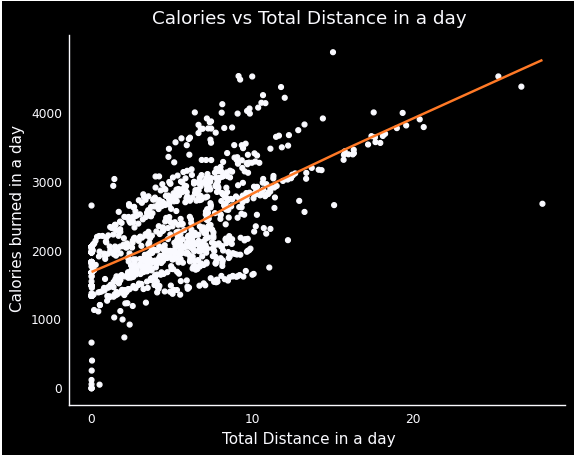

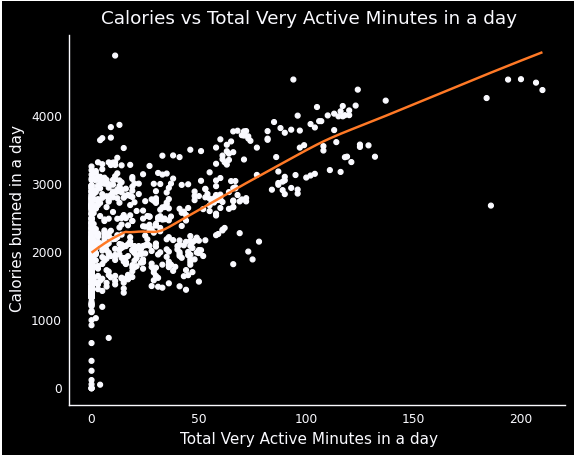

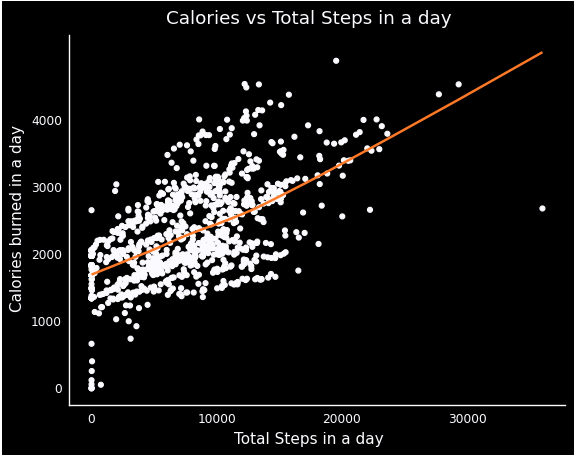

In [11]:
print(ggplot(daily_activity,aes("total_distance","calories"))+geom_point(color="#fafaff")+geom_smooth(color="#ff7926")
     + labs(title="Calories vs Total Distance in a day")
     + xlab("Total Distance in a day") + ylab("Calories burned in a day")
     + scale_y_continuous(breaks=range(0, 5000, 1000))
     +theme(
      rect = element_rect(fill = "#000000"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff")))

print(ggplot(daily_activity,aes("very_active_minutes","calories"))+geom_point(color="#fafaff")+geom_smooth(color="#ff7926")
     + labs(title="Calories vs Total Very Active Minutes in a day")
     + xlab("Total Very Active Minutes in a day") + ylab("Calories burned in a day")
     + scale_y_continuous(breaks=range(0, 5000, 1000))
     +theme(
      rect = element_rect(fill = "#000000"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff")))

print(ggplot(daily_activity,aes("total_steps","calories"))+geom_point(color="#fafaff")+geom_smooth(color="#ff7926")
     + labs(title="Calories vs Total Steps in a day")
     + xlab("Total Steps in a day") + ylab("Calories burned in a day")
     + scale_y_continuous(breaks=range(0, 5000, 1000))
     +theme(
      rect = element_rect(fill = "#000000"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff")))

**Calories** are moderately correlated with **total distance, very active minutes** and **total steps.**
So, to burn more calories on a given day more distance needs to be travelled and more active minutes (high intensity activities) need to be spend.

### Analyzing the data by each day of week

,day_of_week,avg_calories,avg_steps,avg_distance,avg_very_active_distance,avg_moderately_active_distance,avg_light_active_distance,avg_sedentary_active_distance,avg_very_active_minutes,avg_fairly_active_minutes,avg_lightly_active_minutes,avg_sedentary_minutes
0,Mon,2324.208333,7780.866667,5.552917,1.537333,0.585833,3.363083,0.002583,23.108333,14.000000,192.058333,1027.941667
1,Tue,2356.013158,8125.006579,5.832237,1.613289,0.593026,3.471053,0.001447,22.953947,14.335526,197.342105,1007.361842
2,Wed,2302.620000,7559.373333,5.488333,1.633467,0.527067,3.256333,0.001333,20.780000,13.100000,189.853333,989.480000
3,Thu,2199.571429,7405.836735,5.312245,1.390476,0.505170,3.283129,0.002313,19.408163,11.959184,185.421769,961.993197
4,Fri,2331.785714,7448.230159,5.309921,1.312937,0.483810,3.489127,0.001825,20.055556,12.111111,204.198413,1000.309524
5,Sat,2354.967742,8152.975806,5.854677,1.514597,0.677339,3.617177,0.001048,21.919355,15.201613,207.145161,964.282258
6,Sun,2263.000000,6933.231405,5.027190,1.488926,0.618017,2.892314,0.000661,19.983471,14.528926,173.975207,990.256198


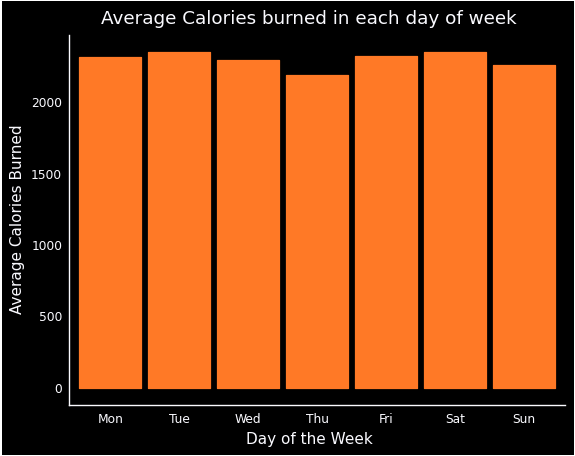

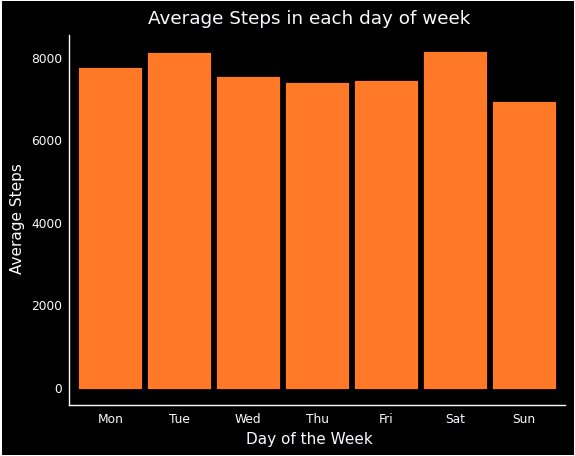

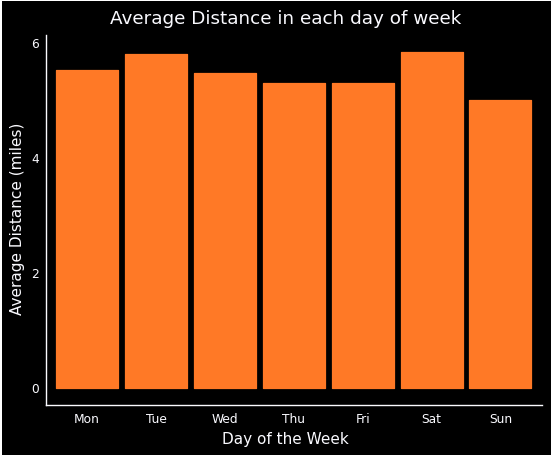

,day_of_week,avg_min_asleep,avg_time_in_bed
0,Mon,419.500000,457.347826
1,Tue,404.538462,443.292308
2,Wed,434.681818,470.030303
3,Thu,401.296875,434.875000
4,Fri,405.421053,445.052632
5,Sat,419.070175,459.842105
6,Sun,452.745455,503.509091


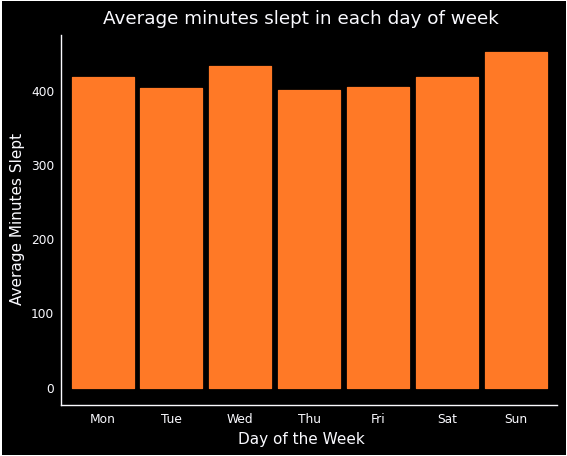

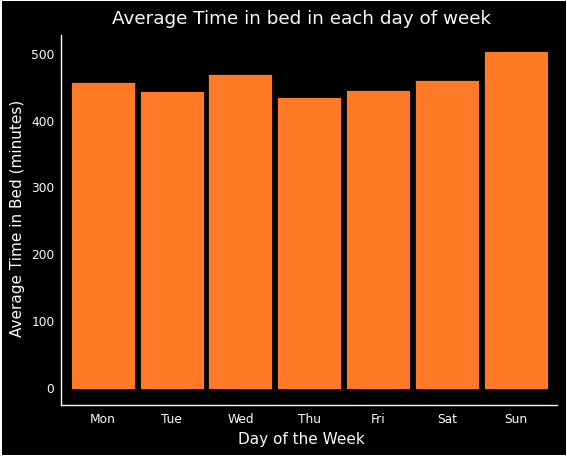

In [12]:
df_daily_activity_by_dow = daily_activity.groupby("day_of_week").agg(avg_calories = ("calories","mean"),avg_steps = ("total_steps","mean"),
                                          avg_distance = ("total_distance","mean"),avg_very_active_distance = ("very_active_distance","mean"),
                                          avg_moderately_active_distance = ("moderately_active_distance","mean"),
                                          avg_light_active_distance = ("light_active_distance","mean"),
                                          avg_sedentary_active_distance = ("sedentary_active_distance","mean"),
                                          avg_very_active_minutes = ("very_active_minutes","mean"),
                                          avg_fairly_active_minutes = ("fairly_active_minutes","mean"),
                                          avg_lightly_active_minutes = ("lightly_active_minutes","mean"),
                                          avg_sedentary_minutes = ("sedentary_minutes","mean")).reset_index()
display(df_daily_activity_by_dow)
df_daily_activity_by_date = daily_activity.groupby("date").agg(avg_calories = ("calories","mean"),avg_steps = ("total_steps","mean"),
                                          avg_distance = ("total_distance","mean"),avg_very_active_distance = ("very_active_distance","mean"),
                                          avg_moderately_active_distance = ("moderately_active_distance","mean"),
                                          avg_light_active_distance = ("light_active_distance","mean"),
                                          avg_sedentary_active_distance = ("sedentary_active_distance","mean"),
                                          avg_very_active_minutes = ("very_active_minutes","mean"),
                                          avg_fairly_active_minutes = ("fairly_active_minutes","mean"),
                                          avg_lightly_active_minutes = ("lightly_active_minutes","mean"),
                                          avg_sedentary_minutes = ("sedentary_minutes","mean")).reset_index()

print(ggplot(df_daily_activity_by_dow,aes(x="day_of_week"))
     + geom_bar(aes(y="avg_calories"),stat="identity",color="#ff7926",fill="#ff7926") 
     + labs(title="Average Calories burned in each day of week")
     + xlab("Day of the Week") + ylab("Average Calories Burned")
     +theme(
      rect = element_rect(fill = "#000000"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff")))

print(ggplot(df_daily_activity_by_dow,aes("day_of_week"))
     + geom_bar(aes(y="avg_steps"),stat="identity",color="#ff7926",fill="#ff7926") 
     + labs(title="Average Steps in each day of week")
     + xlab("Day of the Week") + ylab("Average Steps")
     +theme(
      rect = element_rect(fill = "#000000"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff")))

print(ggplot(df_daily_activity_by_dow,aes("day_of_week"))
     +geom_bar(aes(y="avg_distance"),stat="identity",color="#ff7926",fill="#ff7926") 
     + labs(title="Average Distance in each day of week")
     + xlab("Day of the Week") + ylab("Average Distance (miles)")
     +theme(
      rect = element_rect(fill = "#000000"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff")))

df_day_sleep_by_dow = day_sleep.groupby("day_of_week").agg(avg_min_asleep=("total_minutes_asleep","mean"),avg_time_in_bed=("total_time_in_bed","mean")).reset_index()
display(df_day_sleep_by_dow)

print(ggplot(df_day_sleep_by_dow,aes("day_of_week"))
      +geom_bar(aes(y="avg_min_asleep"),stat="identity",color="#ff7926",fill="#ff7926") 
     + labs(title="Average minutes slept in each day of week")
     + xlab("Day of the Week") + ylab("Average Minutes Slept")
     +theme(
      rect = element_rect(fill = "#000000"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff")))
print(ggplot(df_day_sleep_by_dow,aes("day_of_week"))+geom_bar(aes(y="avg_time_in_bed"),stat="identity",color="#ff7926",fill="#ff7926") 
     + labs(title="Average Time in bed in each day of week")
     + xlab("Day of the Week") + ylab("Average Time in Bed (minutes)")
     +theme(
      rect = element_rect(fill = "#000000"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff")))


On an average the users **burned more calories on Tuesday** and **Saturday**, and **less on Thursday**. The **average steps was greater than 8000 for Tuesday** and **Saturday** and **less than 7000** only on **Sunday**. Users walked **more distances on Tuesday** and **Saturday** and **least on Sunday**.
The users tend to **sleep more on Sundays**, i.e., they wake up late on Sundays.

### Analyzing the data by each hour of the day

,hour_of_day,avg_calories
0,0,71.805139
1,1,70.165059
2,2,69.186495
3,3,67.538049
4,4,68.261803
5,5,81.708155
6,6,86.996778
7,7,94.477981
8,8,103.337272
9,9,106.142857


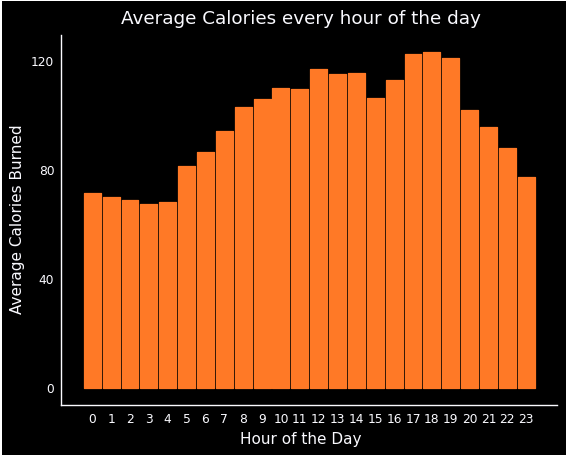

,hour_of_day,avg_steps
0,0,42.188437
1,1,23.102894
2,2,17.110397
3,3,6.426581
4,4,12.699571
5,5,43.869099
6,6,178.508056
7,7,306.049409
8,8,427.544576
9,9,433.301826


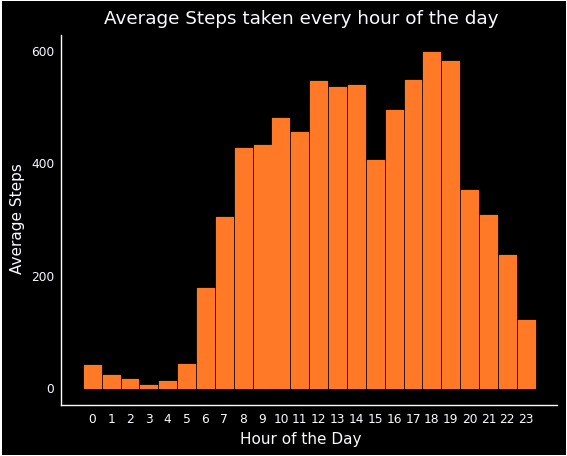

In [13]:
df_hourly_calories = hourly_calories.groupby("hour_of_day").agg(avg_calories=("calories","mean")).reset_index()
display(df_hourly_calories)
print(ggplot(df_hourly_calories,aes("hour_of_day"))+geom_bar(aes(y="avg_calories"),stat="identity",color="#ff7926",fill="#ff7926") 
     + labs(title="Average Calories every hour of the day")
     + xlab("Hour of the Day") + ylab("Average Calories Burned")
     +theme(
      rect = element_rect(fill = "#000000"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff"))
     +scale_x_continuous(breaks=range(0,24,1)))

df_hourly_steps = hourly_steps.groupby("hour_of_day").agg(avg_steps=("steps","mean")).reset_index()
display(df_hourly_steps)
print(ggplot(df_hourly_steps,aes("hour_of_day"))+geom_bar(aes(y="avg_steps"),stat="identity",color="#ff7926",fill="#ff7926") 
     + labs(title="Average Steps taken every hour of the day")
     + xlab("Hour of the Day") + ylab("Average Steps")
     +theme(
      rect = element_rect(fill = "#000000"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff"))
     +scale_x_continuous(breaks=range(0,24,1)))


The most **calories were burned in evening from 5:00 PM to 7:00 PM**. Users took **very less steps around midnight** and **most steps in evening from 5:00 PM to 7:00 PM**.

### Dividing the users into groups based on activity minutes

We form four groups based on how active the users are. For this we first group the data by each user id, then for the users we check for `ver_active_minutes`, `fairly_active_minutes`, `lightly_active_minutes`
, and `sedentart_minutes` to build further groups. The following are the four groups based on the activity minutes:
1. **Very Active** - The users for whom the `very_active_minutes` are greater than the mean of `very_active_minutes` for all users.
2. **Fairly Active** - The users for whom the `fairly_active_minutes` are greater than the mean of `fairly_active_minutes` for all users.
3. **Lightly Active** - The users for whom the `lightly_active_minutes` are greater than the mean of `lightly_active_minutes` for all users.
4. **Sedentary** - The users for whom the `sedentary_minutes` are greater than the mean of `sedentary_minutes` for all users.

<AxesSubplot:>

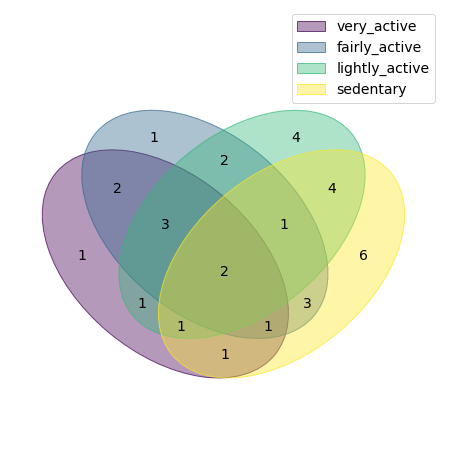

In [14]:
dict_df_by_user = dict()
for item in data_list:
#     display(myVars[item].groupby("id").mean())
    dict_df_by_user[item]=myVars[item].groupby("id").mean().reset_index()

daily_activity_by_user = dict_df_by_user["daily_activity"]

avg_very_active_min = daily_activity_by_user.very_active_minutes.mean()
avg_fairly_active_min = daily_activity_by_user.fairly_active_minutes.mean()
avg_lightly_active_min = daily_activity_by_user.lightly_active_minutes.mean()
avg_sedentary_min = daily_activity_by_user.sedentary_minutes.mean()
very_active = daily_activity_by_user.loc[daily_activity_by_user.very_active_minutes>avg_very_active_min].id.to_list()
fairly_active = daily_activity_by_user.loc[daily_activity_by_user.fairly_active_minutes>avg_fairly_active_min].id.to_list()
lightly_active = daily_activity_by_user.loc[daily_activity_by_user.lightly_active_minutes>avg_lightly_active_min].id.to_list()
sedentary = daily_activity_by_user.loc[daily_activity_by_user.sedentary_minutes>avg_sedentary_min].id.to_list()

petal_labels = venn.generate_petal_labels([set(very_active),set(fairly_active),set(lightly_active),set(sedentary)], fmt="{size}") #{percentage:.1f}%
venn.draw_venn(
    petal_labels=petal_labels, dataset_labels=['very_active','fairly_active','lightly_active','sedentary'],
    hint_hidden=False, colors=venn.generate_colors(n_colors=4),
    figsize=(8, 8), fontsize=14, legend_loc="best", ax=None
    )



We can see the above Venn Diagram representing the four groups. 
There is 1 user who is only very active and 12 users are very active.
There is 1 user who is only fairly active and 15 users are fairly active.
There are 4 users who are only lightly active and 18 users are lightly active.
There are 6 users who are only sedentary and 19 users are sedentary.
So, we can see most of the users are sedentary or lightly active. Now, let us see how do these type of users line up for different parameters.

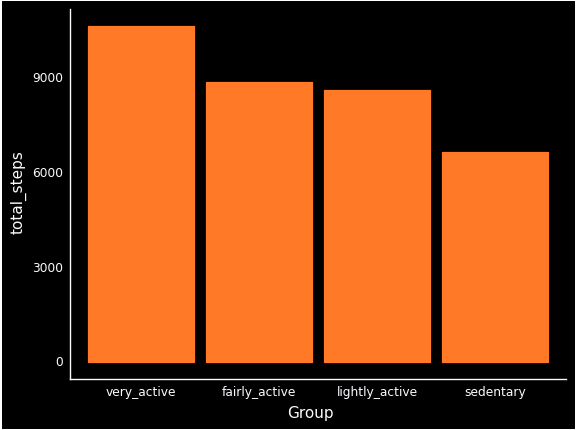

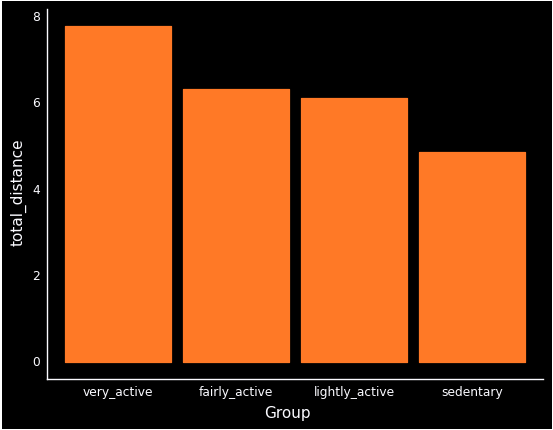

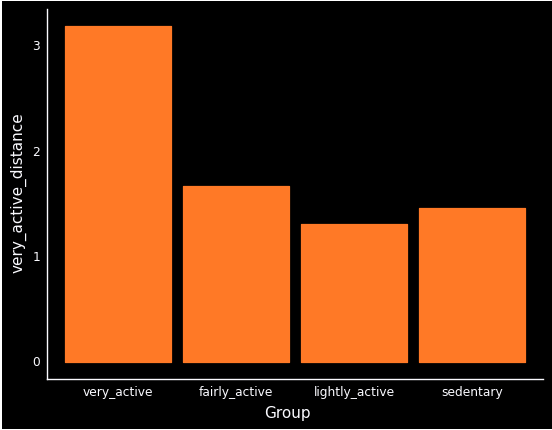

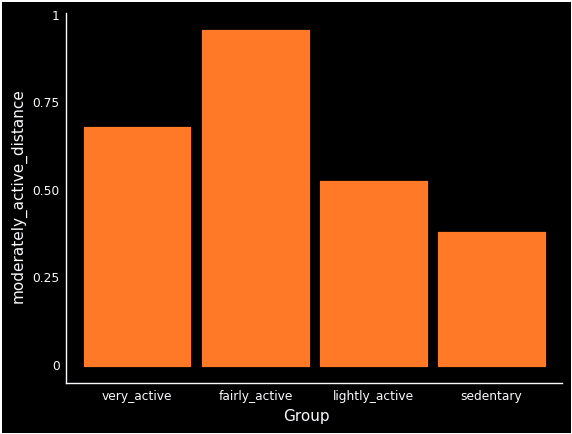

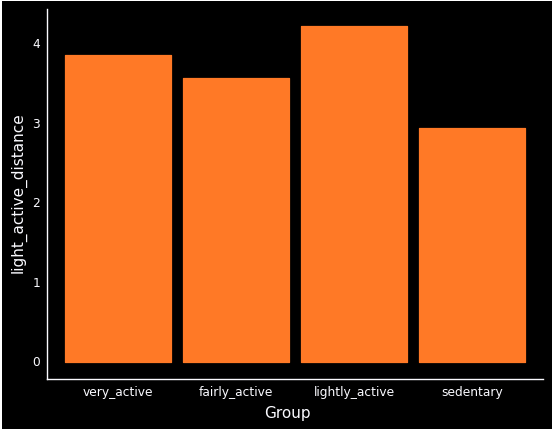

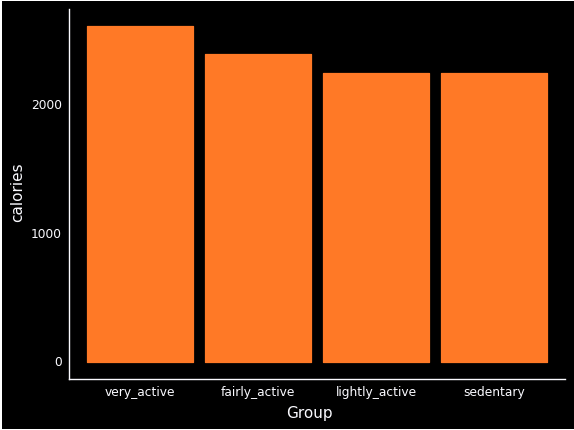

In [15]:
def plot_by_user_grp_activity_daily(data_name,dict_df_by_user,very_active,fairly_active,lightly_active,sedentary):
    df = dict_df_by_user[data_name]
    for part_name in dict_df_by_user["daily_activity"].columns[[1,2,5,6,7,13]]:
        va = df[df.id.isin(very_active)][part_name].mean()
        fa = df[df.id.isin(fairly_active)][part_name].mean()
        la = df[df.id.isin(lightly_active)][part_name].mean()
        sd = df[df.id.isin(sedentary)][part_name].mean()
        df_grp = pd.DataFrame({"Group":["very_active","fairly_active","lightly_active","sedentary"],
                                  part_name:[va,fa,la,sd]})
        df_grp.Group = pd.Categorical(["very_active","fairly_active","lightly_active","sedentary"], categories = ["very_active","fairly_active","lightly_active","sedentary"])
        print(ggplot(df_grp,aes("Group",part_name))+geom_bar(stat="identity",color="#ff7926",fill="#ff7926") 
         +theme(
          rect = element_rect(fill = "#000000"),
          text=element_text(color="#fafaff"),
          panel_grid_major = element_blank(),
          panel_grid_minor = element_blank(),
          panel_border=element_blank(),
          axis_ticks=element_line(color="#fafaff"),
          axis_line=element_line(color="#fafaff")))

plot_by_user_grp_activity_daily("daily_activity",dict_df_by_user,very_active,fairly_active,lightly_active,sedentary)

**Very active** users walked **more steps** and **more distance** (comprising mostly of very active distance) to **burn most calories** compared to other type of users.
Lightly active and sedentary users burned lesser calories compared to other users walking lesser steps and lesser distance.

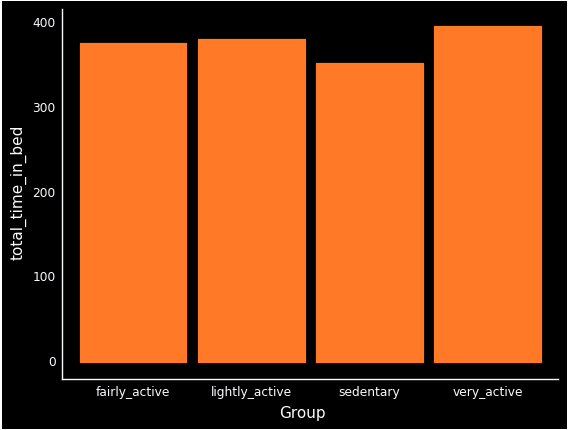

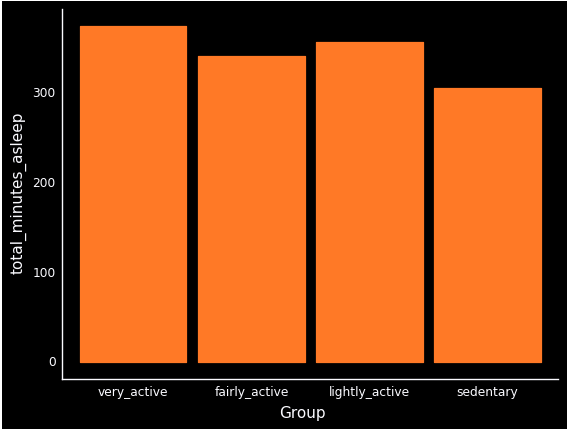

In [16]:
def plot_by_user_grp_activity_sleep(data_name,dict_df_by_user,very_active,fairly_active,lightly_active,sedentary):
    df = dict_df_by_user[data_name]
    if data_name=="day_sleep":
        part_name = df.columns[2]
        part_name2 = df.columns[3]
        va = df[df.id.isin(very_active)][part_name2].mean()
        fa = df[df.id.isin(fairly_active)][part_name2].mean()
        la = df[df.id.isin(lightly_active)][part_name2].mean()
        sd = df[df.id.isin(sedentary)][part_name2].mean()
        df_grp = pd.DataFrame({"Group":["very_active","fairly_active","lightly_active","sedentary"],
                                  part_name2:[va,fa,la,sd]})
        df_grp.group = pd.Categorical(["very_active","fairly_active","lightly_active","sedentary"], categories = ["very_active","fairly_active","lightly_active","sedentary"])
        print(ggplot(df_grp,aes("Group",part_name2))+geom_bar(stat="identity",color="#ff7926",fill="#ff7926") 
          +theme(
          rect = element_rect(fill = "#000000"),
          text=element_text(color="#fafaff"),
          panel_grid_major = element_blank(),
          panel_grid_minor = element_blank(),
          panel_border=element_blank(),
          axis_ticks=element_line(color="#fafaff"),
          axis_line=element_line(color="#fafaff")))
       
    else:
        part_name = df.columns[1]
    
    va = df[df.id.isin(very_active)][part_name].mean()
    fa = df[df.id.isin(fairly_active)][part_name].mean()
    la = df[df.id.isin(lightly_active)][part_name].mean()
    sd = df[df.id.isin(sedentary)][part_name].mean()
    df_grp = pd.DataFrame({"Group":["very_active","fairly_active","lightly_active","sedentary"],
                                  part_name:[va,fa,la,sd]})
    df_grp.Group = pd.Categorical(["very_active","fairly_active","lightly_active","sedentary"], categories = ["very_active","fairly_active","lightly_active","sedentary"])
    print(ggplot(df_grp,aes("Group",part_name))+geom_bar(stat="identity",color="#ff7926",fill="#ff7926") 
      +theme(
      rect = element_rect(fill = "#000000"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff")))

plot_by_user_grp_activity_sleep("day_sleep",dict_df_by_user,very_active,fairly_active,lightly_active,sedentary)


**Very active** users **slept the most** and sedentary users slept the least.

### Dividing the users into groups based on total steps

We divide the users into three groups based on the daily average steps taken:
1. **Very Active Walkers**: Greater than equal to 10000 steps 
2. **Fairly Active Walkers**: Greater than equal to 6000 and less than 10000 steps
3. **Less Active Walkers**: Less than 6000 steps

<AxesSubplot:>

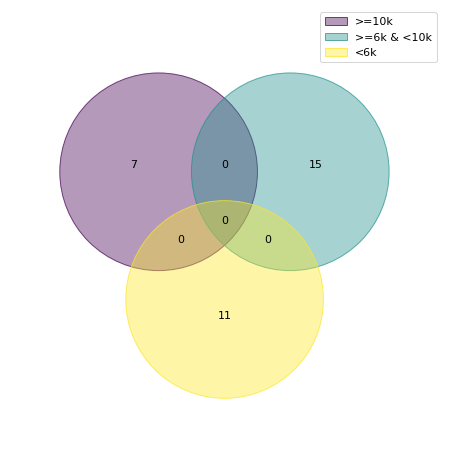

In [17]:
daily_activity_by_user = daily_activity.groupby("id").mean().reset_index()
# display(daily_activity_by_user.total_steps.mean())
gt_10k = daily_activity_by_user.loc[daily_activity_by_user.total_steps>=10000].id.to_list()
bt_6_10k = daily_activity_by_user.loc[(daily_activity_by_user.total_steps>=6000)&(daily_activity_by_user.total_steps<10000)].id.to_list()
lt_6k = daily_activity_by_user.loc[daily_activity_by_user.total_steps<6000].id.to_list()

petal_labels = venn.generate_petal_labels([set(gt_10k),set(bt_6_10k),set(lt_6k)], fmt="{size}") #{percentage:.1f}%
venn.draw_venn(
     petal_labels=petal_labels, dataset_labels=['>=10k','>=6k & <10k','<6k'],
     hint_hidden=False, colors=venn.generate_colors(n_colors=3),
     figsize=(8, 8), fontsize=11, legend_loc="best", ax=None
     )
# display(daily_activity_by_user)


We can see there are 7 users who took greater than equal to 10000 steps, 15 users who took greater than equal to 6000 steps and less than 10000 steps, and 11 users who took less than 6000 steps. Now, let's see analyse how these three groups of users vary based on different parameters.

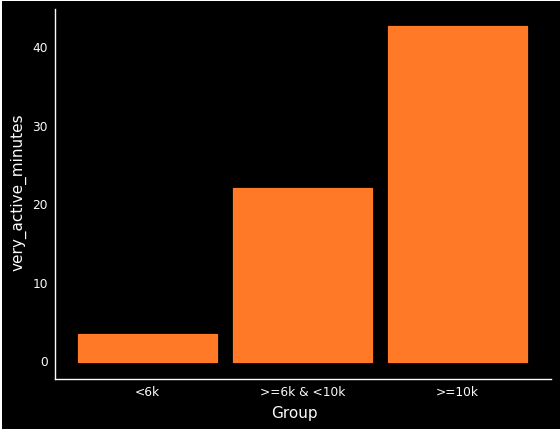

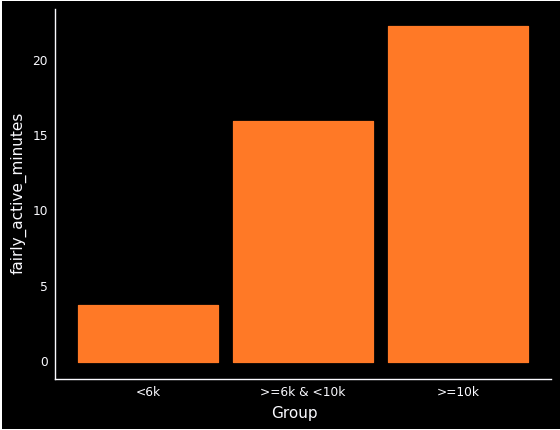

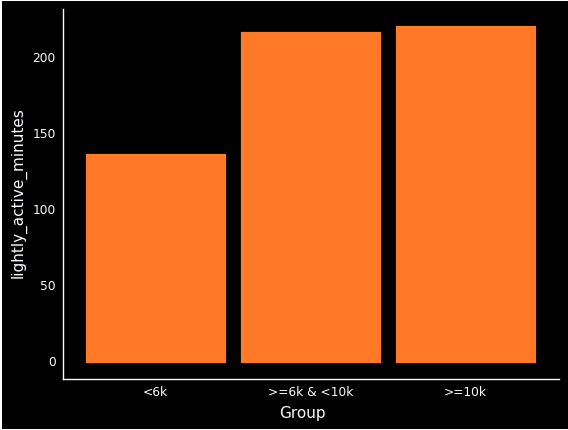

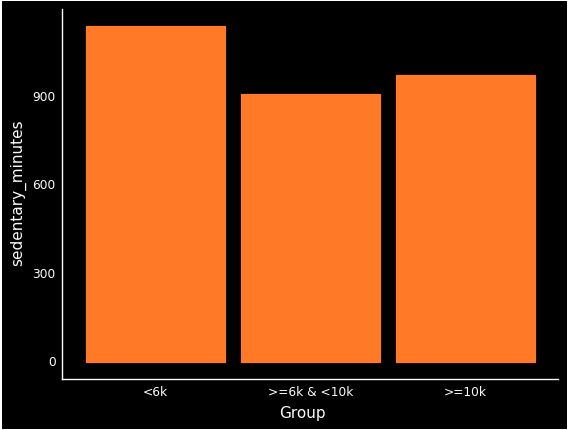

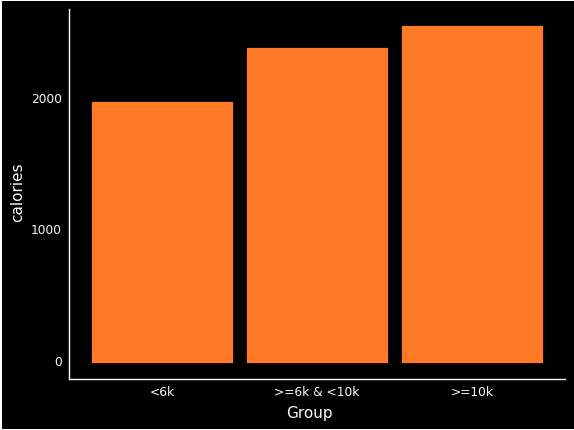

In [18]:
def plot_by_user_grp_steps_daily(data_name,dict_df_by_user,gt_10k,bt_6_10k,lt_6k):
    df = dict_df_by_user[data_name]
    for part_name in dict_df_by_user["daily_activity"].columns[[9,10,11,12,13]]:
        gt_10 = df[df.id.isin(gt_10k)][part_name].mean()
        bt_6_10 = df[df.id.isin(bt_6_10k)][part_name].mean()
        lt_6 = df[df.id.isin(lt_6k)][part_name].mean()
        
        df_grp = pd.DataFrame({"Group":[">=10k",">=6k & <10k","<6k"],
                                  part_name:[gt_10,bt_6_10,lt_6]})
        df_grp.Group = pd.Categorical([">=10k",">=6k & <10k","<6k"], categories = ["<6k",">=6k & <10k",">=10k"])
        print(ggplot(df_grp,aes("Group",part_name))+geom_bar(stat="identity",color="#ff7926",fill="#ff7926") 
          +theme(
          rect = element_rect(fill = "#000000"),
          text=element_text(color="#fafaff"),
          panel_grid_major = element_blank(),
          panel_grid_minor = element_blank(),
          panel_border=element_blank(),
          axis_ticks=element_line(color="#fafaff"),
          axis_line=element_line(color="#fafaff")))
    
plot_by_user_grp_steps_daily("daily_activity",dict_df_by_user,gt_10k,bt_6_10k,lt_6k)

Users who took more than 10000 steps burned the most calories, spent the most very active minutes. The sedentary minutes were most for users who walked less than 6000 steps, and least for users who walked between 6000 and 10000 steps.

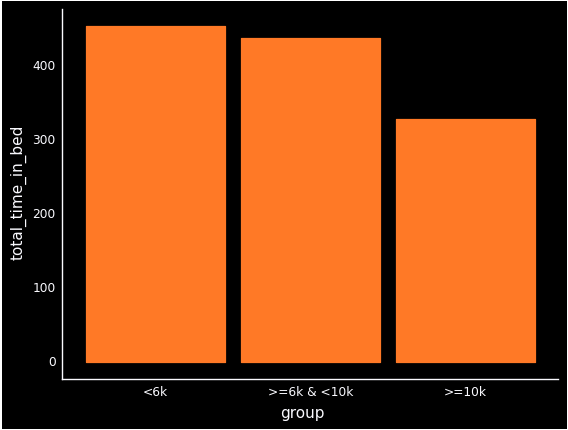

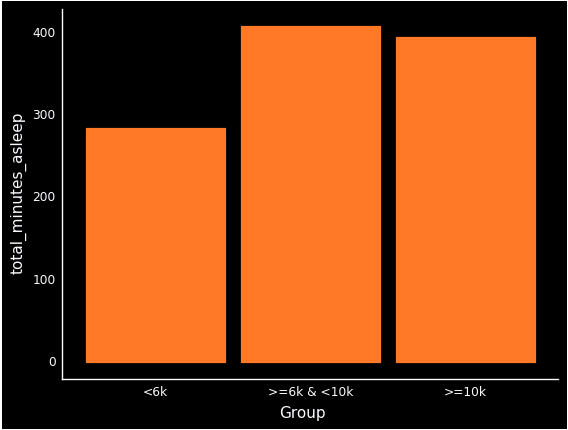

In [19]:
def plot_by_user_grp_steps_sleep(data_name,dict_df_by_user,gt_10k,bt_6_10k,lt_6k):
    df = dict_df_by_user[data_name]
    if data_name=="day_sleep":
        part_name = df.columns[2]
        part_name2 = df.columns[3]
        gt_10 = df[df.id.isin(gt_10k)][part_name2].mean()
        bt_6_10 = df[df.id.isin(bt_6_10k)][part_name2].mean()
        lt_6 = df[df.id.isin(lt_6k)][part_name2].mean()
        
        df_grp = pd.DataFrame({"group":[">=10k",">=6k & <10k","<6k"],
                                  part_name2:[gt_10,bt_6_10,lt_6]})
        df_grp.group = pd.Categorical([">=10k",">=6k & <10k","<6k"], categories = ["<6k",">=6k & <10k",">=10k"])
        print(ggplot(df_grp,aes("group",part_name2))+geom_bar(stat="identity",color="#ff7926",fill="#ff7926") 
         +theme(
          rect = element_rect(fill = "#000000"),
          text=element_text(color="#fafaff"),
          panel_grid_major = element_blank(),
          panel_grid_minor = element_blank(),
          panel_border=element_blank(),
          axis_ticks=element_line(color="#fafaff"),
          axis_line=element_line(color="#fafaff")))
       
    else:
        part_name = df.columns[1]
    
    gt_10 = df[df.id.isin(gt_10k)][part_name].mean()
    bt_6_10 = df[df.id.isin(bt_6_10k)][part_name].mean()
    lt_6 = df[df.id.isin(lt_6k)][part_name].mean()
    
    df_grp = pd.DataFrame({"Group":[">=10k",">=6k & <10k","<6k"],
                                  part_name:[gt_10,bt_6_10,lt_6]})
    df_grp.Group = pd.Categorical(["<6k",">=6k & <10k",">=10k"], categories = ["<6k",">=6k & <10k",">=10k"])
    print(ggplot(df_grp,aes("Group",part_name))+geom_bar(stat="identity",color="#ff7926",fill="#ff7926") 
          +theme(
          rect = element_rect(fill = "#000000"),
          text=element_text(color="#fafaff"),
          panel_grid_major = element_blank(),
          panel_grid_minor = element_blank(),
          panel_border=element_blank(),
          axis_ticks=element_line(color="#fafaff"),
          axis_line=element_line(color="#fafaff")))

plot_by_user_grp_steps_sleep("day_sleep",dict_df_by_user,gt_10k,bt_6_10k,lt_6k)

The users who took less than 6000 steps and more than 10000 steps were not able to sleep properly while those who took steps between 6000 and 10000 steps slept good as visible in the above bar graphs.

### Dividing the users into groups based on sleep minutes

We divide the users based on the minutes they slept. The following groups are formed:
1. **Bad Sleepers** - those who slept less than 360 minutes
2. **Normal Sleepers** - those who slept greater than equal to 360 minutes and less than 480 minnutes
3. **Over Sleepers** - those who slepts greater than equal to 480 minutes

<AxesSubplot:>

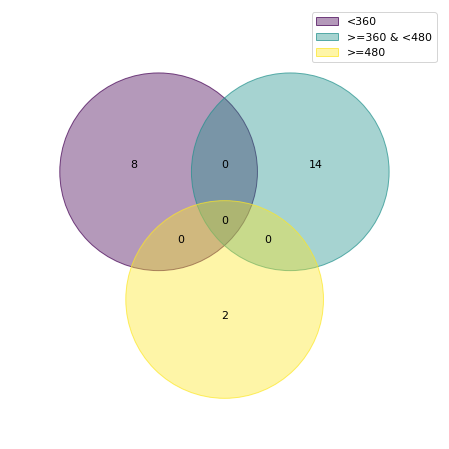

In [20]:
daily_activity_by_user = day_sleep.groupby("id").mean().reset_index()
# display(daily_activity_by_user.total_steps.mean())
bad_sleeper = daily_activity_by_user.loc[daily_activity_by_user.total_minutes_asleep<360].id.to_list()
normal_sleeper = daily_activity_by_user.loc[(daily_activity_by_user.total_minutes_asleep>=360)&(daily_activity_by_user.total_minutes_asleep<480)].id.to_list()
over_sleeper = daily_activity_by_user.loc[daily_activity_by_user.total_minutes_asleep>=480].id.to_list()

petal_labels = venn.generate_petal_labels([set(bad_sleeper),set(normal_sleeper),set(over_sleeper)], fmt="{size}") #{percentage:.1f}%
venn.draw_venn(
     petal_labels=petal_labels, dataset_labels=['<360','>=360 & <480','>=480'],
     hint_hidden=False, colors=venn.generate_colors(n_colors=3),
     figsize=(8, 8), fontsize=11, legend_loc="best", ax=None
     )

There are 8 bad sleepers, 14 normal sleepers and 2 over sleepers. 

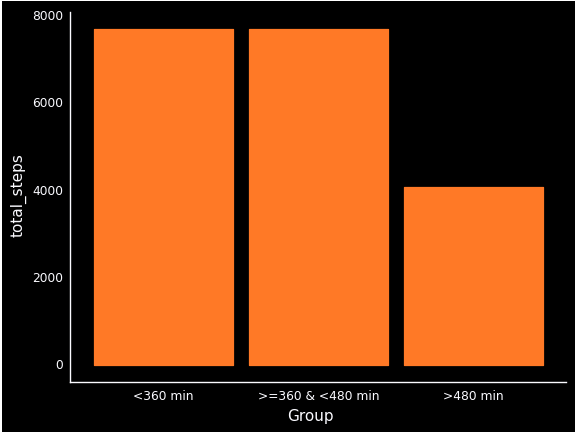

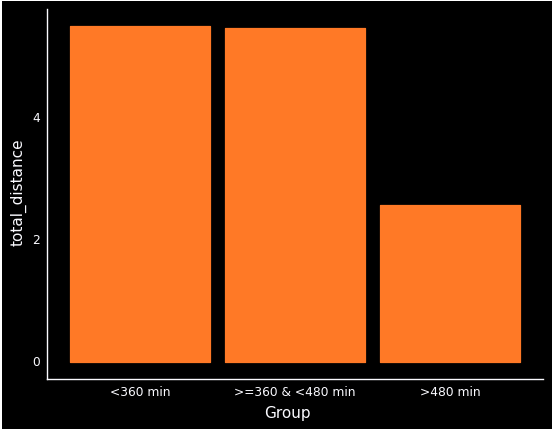

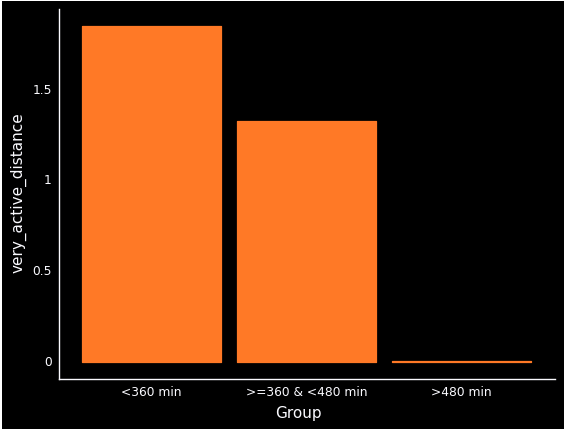

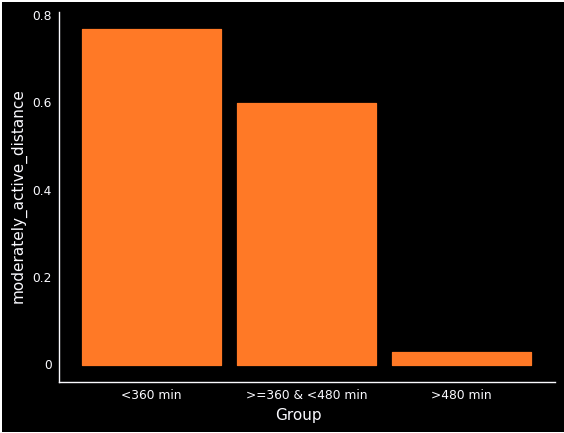

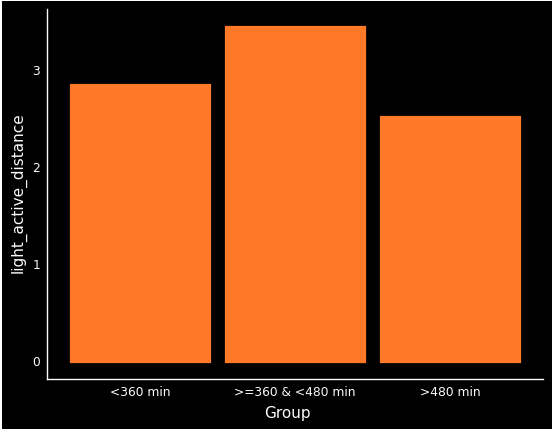

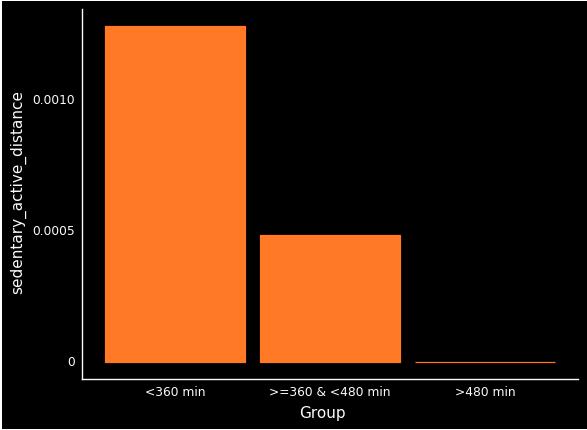

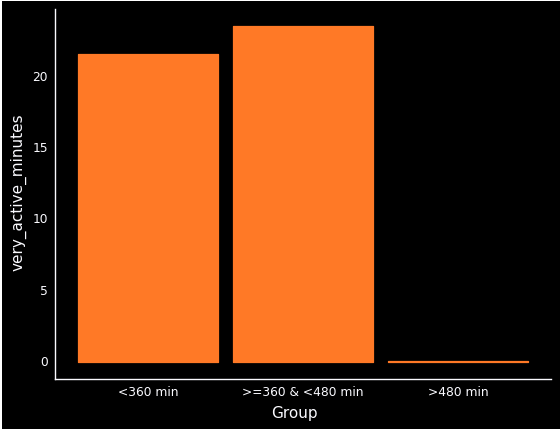

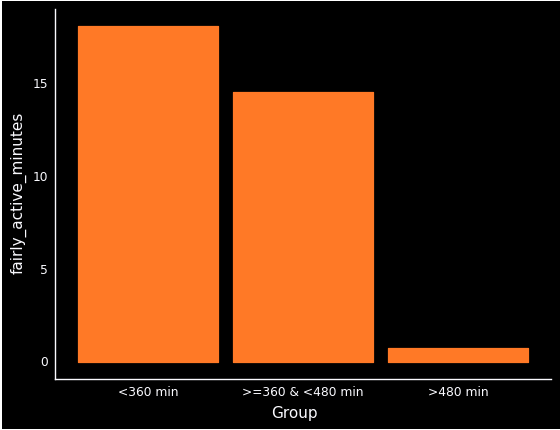

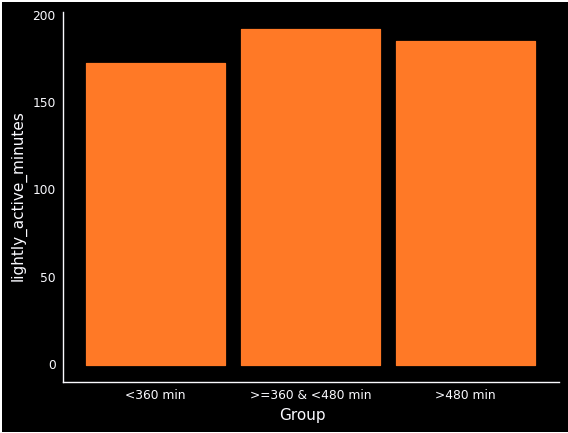

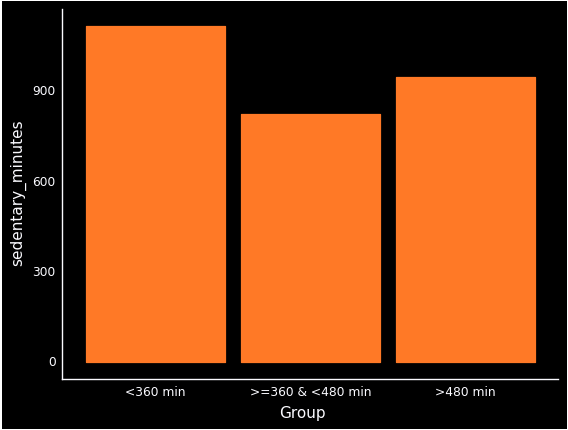

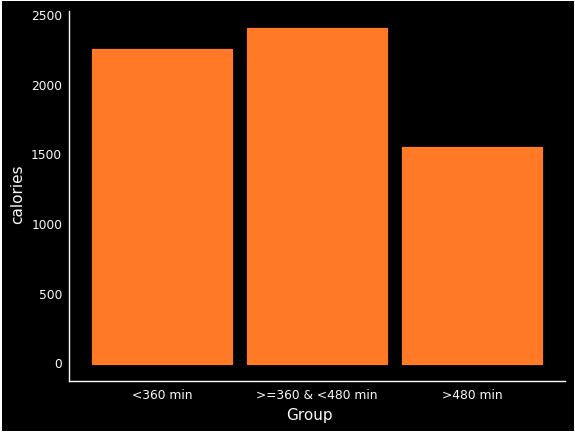

In [21]:
def plot_by_user_grp_steps_daily(data_name,dict_df_by_user,bad_sleeper,normal_sleeper,over_sleeper):
    df = dict_df_by_user[data_name]
    for part_name in dict_df_by_user["daily_activity"].columns[[1,2,5,6,7,8,9,10,11,12,13]]:
        bs = df[df.id.isin(bad_sleeper)][part_name].mean()
        ns = df[df.id.isin(normal_sleeper)][part_name].mean()
        os = df[df.id.isin(over_sleeper)][part_name].mean()
            # "bad_sleeper","normal_sleeper","over_sleeper"
        df_grp = pd.DataFrame({"Group":["<360 min",">=360 & <480 min",">480 min"],
                                  part_name:[bs,ns,os]})
        df_grp.Group = pd.Categorical(["<360 min",">=360 & <480 min",">480 min"], categories = ["<360 min",">=360 & <480 min",">480 min"])
        print(ggplot(df_grp,aes("Group",part_name))+geom_bar(stat="identity",color="#ff7926",fill="#ff7926") 
          +theme(
          rect = element_rect(fill = "#000000"),
          text=element_text(color="#fafaff"),
          panel_grid_major = element_blank(),
          panel_grid_minor = element_blank(),
          panel_border=element_blank(),
          axis_ticks=element_line(color="#fafaff"),
          axis_line=element_line(color="#fafaff")))
    
plot_by_user_grp_steps_daily("daily_activity",dict_df_by_user,bad_sleeper,normal_sleeper,over_sleeper)

Over Sleepers walked the least steps, least distance, spent least time in activities and burnt the least calories. Bad Sleepers walked the most steps, most distance, spent most time in activities, but the Normal Sleepers who took almost similar steps, distances and more very active minutes burnt the most calories. 

# Share Phase

A **[presentation](https://www.canva.com/design/DAFW09zRmNA/eAKqKS1cMZqT0XBG-K4iYw/view?utm_content=DAFW09zRmNA&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)** is prepared to share the key findings and provide recommendations. Please find it **[here](https://www.canva.com/design/DAFW09zRmNA/eAKqKS1cMZqT0XBG-K4iYw/view?utm_content=DAFW09zRmNA&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton).**

Summarizing the Analysis:

1. The users tend to **burn more calories at start (Tuesdays)** and **end of the week (Saturdays)**, i.e., they focus more on physical activities on these two days.
2. **Most calories** were burned between **5:00 PM to 7:00 PM** in a day.
3. The users who spent **more very active minutes burned most calories.**
4. Users who took **more than 10000 steps** on average in a day burned the **most calories but spent least time in bed.**
5. Users who took between **6000 and 10000 steps on average in a day slept properly (>400 mins on average in a day).** 
6. Users who **slept between 360 to 480 minutes** spent the **most minutes in very active activities** and **burned the most calories.** 

Based on the findings recommendations are as follows:

1. The digital marketing campaigns should go live around Tuesdays and Saturdays when the users tend to burn more calories. Live webinars can be conducted around these days to promote Bellabeat products. 
2. Posts on social media pages related to how sleep pattern and calories burned are related to a healthy lifestyle, and how it can be best tracked with help of Bellabeat products.
3. Articles related to relation between calories burned and time spent on high intensity activities.  Focus should be on how women can to take out time for themselves in a day to do such physical activities with help of Bellabeat products.
4. The ads over digital platforms should focus on how women can use Bellabeat products to know when is the best time for them to perform some physical activity, walking between 6000 and 10000 steps in a day. and how to track the sleep pattern to reduce stress levels.

# Act Phase
In this phase the stakeholders involved - Urška Sršen (cofounder and chief creative officer) can take actions based on the recommendations shared in the share phase.